**Vector Autoregression (VAR)** is a statistical model for multivariate time series analysis, especially in a time series where the variables have a relationship that affects each other to time. VAR models are different from univariate autoregressive models because they allow analysis and make predictions on multivariate time series data. VAR models are often used in economics and weather forecasting. It make AR equation of each  variable
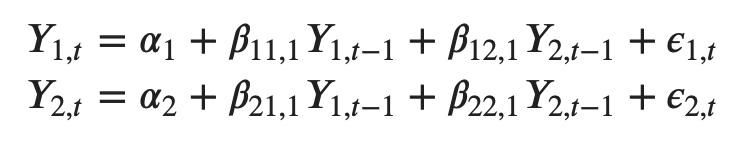

**Import Libraries**

In [17]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime  # for time formating
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

import statsmodels.api  as sm
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

import warnings     # avoide the warning
warnings.filterwarnings("ignore")

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/surendra769/Econometrics-and-Finance/main/DailyDelhiClimateTest.csv')
df.head()


# we have the dataset from 1st Jamuary 2017 to 24  April 2017 

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


We will  take  date, mean pressure, humidity, wind_speed as train variable and mean temp as test variable.

In [19]:
df.info()  # need to convert date column to date data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB


In [20]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


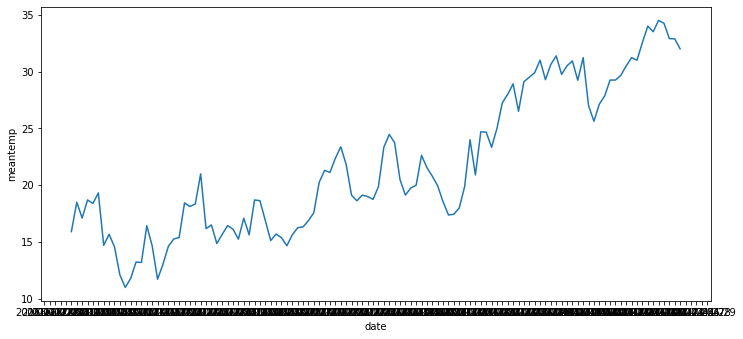

In [21]:
## plot the time series

plt.figure(figsize=(12,6))
plt.gcf().autofmt_xdate()
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=6))
sns.lineplot( df['date'],  df['meantemp'])
plt.gca().xaxis.set_major_locator(mdates.DayLocator());


Unable to see the date cearly  therefore we will change the range of date.

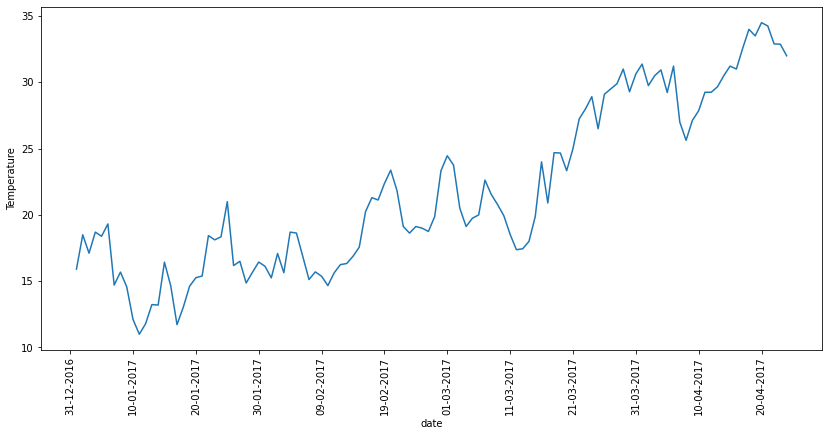

In [22]:
plt.figure(figsize = (14,7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))     #specify the date foramt of  xaxis

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=10))  # specify  the interval
plt.gcf().autofmt_xdate()    # manage the space

sns.lineplot(df['date'], df['meantemp'])
plt.ylabel('Temperature')

plt.xticks(rotation=90)     # rotate the xaxis value by 90 degree
plt.show()

**Inference**: It is observed that over the month there is increase in temperature.

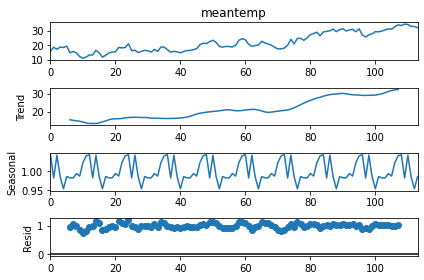

In [23]:
## to get  the better idea about trend, cyclical variation and  residuall
decomposition = sm.tsa.seasonal_decompose(df['meantemp'],period = 12, model = 'multiplicative' )
decomposition.plot()
plt.show()     # to get only one plot 

**Infernece**: we clearly see the upward trend in trend plpot alsoe see  the seasonal variation which  repeat each 20 days

In [24]:
# function to  calcualte Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):  
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

## Statistical Time-Series

Im Multi-variate Time series Analysis  we use VAR(vector  Auto  Regressive)  

Stationarity: Similar to the Augmented Dickey-Fuller test for univariate series, we have Johansen’s test for checking the stationarity of any multivariate time series data. 

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.api import VAR

### Hypothesis Testing for stationarity check (ADF test)
Ho: series  is not stationary  
H1: series is stationary

In [26]:
## first we chcke the stationrity  of all variable
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1]> 0.05:         # adf test first value is statistic and  second value is p value
    print('{} series is not stationary'.format(df.columns[i]))

  else:
    print('{} series is  stationary'.format(df.columns[i]))

date series is not stationary
meantemp series is not stationary
humidity series is not stationary
wind_speed series is  stationary
meanpressure series is not stationary


**Inference**: ignore the date series and  it is found that mean_temp and  humidity and meanpressure are not stationnarity so we need make them stationary.

In [27]:
df['meantemp'] = np.diff(df['meantemp'], n = 1,prepend = df['meantemp'][1])    # without prepend we get one value less as it value start from 2 value -1 value of column
df['humidity'] = np.diff(df['humidity'], n = 1, prepend = df['humidity'][1] )    # to  make equal  value  of row we substract 1st value with help of predend 
df['meanpressure'] = np.diff(df['meanpressure'], n = 1,prepend =df['meanpressure'][1])   # we can take  any value in predend, we take second  value as it is  close to first value

In [28]:
## again check the stationarity
for i in range(len(df.columns)):
  result = adfuller(df[df.columns[i]])

  if result[1]> 0.05:         # adf test first value is statistic and  second value is p value
    print('{} series is not stationary'.format(df.columns[i]))

  else:
    print('{} series is  stationary'.format(df.columns[i]))

## now all are stationary and we can move to new part

date series is not stationary
meantemp series is  stationary
humidity series is  stationary
wind_speed series is  stationary
meanpressure series is  stationary



Now we take causelity check that by which variable/ time series cause change in mean temp series for this purpose we wil  use grangercausalitytests  

Granger Causality test is used to determine whether or not one time series is useful for forecasting another.  

Null Hypothesis (H0): Time series x does not Granger-cause time series y

Alternative Hypothesis (HA): Time series x Granger-causes time series y



In [29]:
f = grangercausalitytests(df[['meantemp','humidity']], maxlag = [2])   # first variable  is respose variable, second varible  is predictor variable
# here we take consideratin p value of F test



Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.5613  , p=0.0318  , df_denom=107, df_num=2
ssr based chi2 test:   chi2=7.4553  , p=0.0240  , df=2
likelihood ratio test: chi2=7.2177  , p=0.0271  , df=2
parameter F test:         F=3.5613  , p=0.0318  , df_denom=107, df_num=2


In [30]:
for i in  range(len(df.columns)-2):
  print(df.columns[i + 2])
  

humidity
wind_speed
meanpressure


In [31]:
maxlag = 10

for i in range(len(df.columns)-2):
  results = grangercausalitytests(df[['meantemp', df.columns[i+2]]], maxlag= maxlag, verbose = False)
  p_value = [round(results[i+1][0]['ssr_ftest'][1], 4) for i in range(maxlag)]
  print('Column  - {} : P-values - {}'.format(df.columns[i+2], p_value))

Column  - humidity : P-values - [0.027, 0.0318, 0.0728, 0.0566, 0.0657, 0.064, 0.0604, 0.0777, 0.0709, 0.1004]
Column  - wind_speed : P-values - [0.3052, 0.1272, 0.2549, 0.3129, 0.5108, 0.534, 0.7518, 0.4748, 0.5069, 0.7425]
Column  - meanpressure : P-values - [0.167, 0.5497, 0.8607, 0.2078, 0.0234, 0.0152, 0.143, 0.0105, 0.0004, 0.0023]


**Inference**: For  most of p value is greater than 0.05 therefore we fail to reject null hypothesis and  conclude that no varaible is helping in predictive the meantemp variable.  

but we only have three variable so we will not drop any variable.

## VAR Model  
In VAR(Vector  Auto regression) we take all previous value of each variable so this we develop the VAR model.  
The main task is to find the order for VAR. one way is to take range of lags(order) and select that one which have lower AIC and BIC value 

In [32]:
## we will take 80-20 train test 

train = df.iloc[:int(df.shape[0]*0.80),]  
test = df.iloc[int(df.shape[0]*0.80):,]

In [33]:
train = train.drop(['date'], axis = 1)

In [34]:
m = VAR(train).fit()
m.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Dec, 2022
Time:                     14:27:24
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    16.1913
Nobs:                     90.0000    HQIC:                   15.8598
Log likelihood:          -1194.43    FPE:                6.17614e+06
AIC:                      15.6357    Det(Omega_mle):     4.97500e+06
--------------------------------------------------------------------
Results for equation meantemp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                   0.566195         0.481369            1.176           0.240
L1.meantemp            -0.066614         0.116066           -0.574           0.566
L1.humidity             0.036580         0.027398

In [35]:
model = VAR(train)
for i in range(15):
  results = model.fit(i+1)
  print('Order :', i+1)
  print('AIC :', results.aic)
  print('BIC:', results.bic)

# we prefer that order which  AIC and BIC is  low

Order : 1
AIC : 15.635745733375769
BIC: 16.19125899344916
Order : 2
AIC : 8.339654773804593
BIC: 9.346294204258044
Order : 3
AIC : 8.55590370840197
BIC: 10.01978455332091
Order : 4
AIC : 8.663435848423482
BIC: 10.59081230898109
Order : 5
AIC : 8.706241777366486
BIC: 11.103511229521075
Order : 6
AIC : 8.760337741734865
BIC: 11.634045102311708
Order : 7
AIC : 8.91947546266693
BIC: 12.27631770868865
Order : 8
AIC : 8.817223153982333
BIC: 12.664054000116682
Order : 9
AIC : 8.754879196678095
BIC: 13.098713935642845
Order : 10
AIC : 8.780273595793371
BIC: 13.628294106488184
Order : 11
AIC : 8.807719245846767
BIC: 14.167279173863
Order : 12
AIC : 8.953298006171488
BIC: 14.83192812115296
Order : 13
AIC : 8.990711540661135
BIC: 15.396125274740537
Order : 14
AIC : 8.302212072256623
BIC: 15.242311243459739
Order : 15
AIC : 7.237953908486288
BIC: 14.720834632563458


In [36]:
## another way to  choose order(lag) which is better is select_order function
model.select_order(15).summary()
# we will take lag 2 which have lowest FPE, even we take any consideration metrix

,AIC,BIC,FPE,HQIC
0,8.462,8.584*,4731.,8.511*
1,8.336,8.949,4174.,8.581
2,8.281,9.385,3966.*,8.722
3,8.550,10.14,5237.,9.187
4,8.776,10.86,6679.,9.609
5,8.972,11.55,8357.,10.00
6,8.860,11.93,7801.,10.09
7,8.892,12.45,8554.,10.31
8,8.910,12.96,9477.,10.53
9,8.912,13.45,1.064e+04,10.73


In [37]:
VAR_model = model.fit(2)
VAR_model.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 23, Dec, 2022
Time:                     14:27:24
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    9.34629
Nobs:                     89.0000    HQIC:                   8.74540
Log likelihood:          -840.257    FPE:                    4198.28
AIC:                      8.33965    Det(Omega_mle):         2855.79
--------------------------------------------------------------------
Results for equation meantemp
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const                  -0.169287         0.606589           -0.279           0.780
L1.meantemp            -0.052864         0.117081           -0.452           0.652
L1.humidity             0.033915         0.031179

**Inference**: We see that VAR Make a individual equation for each 4 variable of lag2

In [38]:
lag = results.k_ar
lag

15

In [39]:
test.shape

(23, 5)

In [40]:
pred_df = pd.DataFrame(VAR_model.forecast(train.values[-lag:], steps = 23))  # it predict for all 4 variable but we need only meanTemp variable, step is 23 because rest size is 23 
pred_df.head()

,0,1,2,3
0,-0.307797,1.271495,8.196697,-0.361549
1,0.345292,-1.279063,8.252620,-0.083260
2,0.109990,-0.200434,8.097929,-0.089471
3,0.186332,-0.408270,8.159842,-0.148481
4,0.143496,-0.361308,8.111816,-0.128832


In [41]:
pred_df.columns= ['a', 'b', 'c', 'd']

In [42]:
test.head()

,date,meantemp,humidity,wind_speed,meanpressure
91,2017-04-02,-1.625000,-1.375000,9.262500,-0.750000
92,2017-04-03,0.750000,-4.000000,6.937500,0.000000
93,2017-04-04,0.433333,2.116667,14.320000,2.950000
94,2017-04-05,-1.702564,14.133333,14.384615,-2.200000
95,2017-04-06,1.991453,-20.000000,13.577778,-2.111111


In [43]:
test.reset_index(inplace = True)

In [44]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(test['meantemp'], pred_df['a']))
rms

1.3752974407537286

In [45]:
MAPE(test['meantemp'], pred_df['a'])  # due to negative and postive it is not able to calculate

inf

In [46]:
test.join(pred_df['a']) ## adding predicted temp to test data

,index,date,meantemp,humidity,wind_speed,meanpressure,a
0,91,2017-04-02,-1.625000,-1.375000,9.262500,-0.750000,-0.307797
1,92,2017-04-03,0.750000,-4.000000,6.937500,0.000000,0.345292
2,93,2017-04-04,0.433333,2.116667,14.320000,2.950000,0.109990
3,94,2017-04-05,-1.702564,14.133333,14.384615,-2.200000,0.186332
4,95,2017-04-06,1.991453,-20.000000,13.577778,-2.111111,0.143496
5,96,2017-04-07,-4.222222,3.875000,4.650000,4.486111,0.158508
6,97,2017-04-08,-1.375000,-0.500000,8.337500,3.000000,0.150795
7,98,2017-04-09,1.500000,-8.250000,14.125000,0.250000,0.153151
8,99,2017-04-10,0.732143,-1.696429,19.314286,-2.053571,0.152189
9,100,2017-04-11,1.392857,-1.678571,15.512500,-2.321429,0.152754


In [47]:
df_coeff = pd.DataFrame([VAR_model.params['meantemp'], VAR_model.pvalues['meantemp']]).T  # give the coefficent and  p value of meantemp var 


In [48]:
df_coeff.columns = ['coeff', 'pval']

In [49]:
df_coeff.query('pval< 0.05')
np.where(df_coeff['pval'] <0.05, 1,0)

df_coeff['valid'] = np.where(df_coeff['pval'] <0.05, 1,0)

In [50]:
df_coeff

,coeff,pval,valid
const,-0.169287,0.780183,0
L1.meantemp,-0.052864,0.651619,0
L1.humidity,0.033915,0.276702,0
L1.wind_speed,-0.090511,0.145039,0
L1.meanpressure,0.000687,0.796689,0
L2.meantemp,-0.077957,0.547204,0
L2.humidity,-0.022084,0.422422,0
L2.wind_speed,0.133297,0.033270,1
L2.meanpressure,0.001636,0.379798,0
